# Simulation of Vessel Trajectories & Anomalies

In [31]:
from datetime import datetime, timedelta
import json

from model import ShipModel

config_file="config/config.json"
with open(config_file) as f:
    config = json.load(f)

steps = config["simulation_steps"]
    
model = ShipModel(
    width=config["width"],
    height=config["height"],
    num_ships=config["num_ships"],
    ports=config["ports"],
    obstacles=config["obstacles"],
    dwa_config=config["dwa_config"],
    resolution=config["resolution"],
    obstacle_threshold=config["obstacle_threshold"],
    lookahead=config["lookahead"]
)

for type, agents in model.agents_by_type.items():
    print(f'{type}: {len(agents)}')

d:\projects\mobispaces\mesa\mesa\examples\basic\ships_v2\model.py:93: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position (1, 11). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(obstacle, (x, y))
d:\projects\mobispaces\mesa\mesa\examples\basic\ships_v2\model.py:93: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position (1, 12). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(obstacle, (x, y))
d:\projects\mobispaces\mesa\mesa\examples\basic\ships_v2\model.py:93: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position (1, 13). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(obstacle, (x, y))
d:\projects\mobispaces\mesa\mesa\e

<class 'agents.obstacle.Obstacle'>: 8
<class 'agents.port.Port'>: 6
<class 'agents.ship.Ship'>: 20


d:\projects\mobispaces\mesa\mesa\examples\basic\ships_v2\model.py:93: UserWarning: Agent 4 is being placed with
place_agent() despite already having the position (18, 54). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(obstacle, (x, y))
d:\projects\mobispaces\mesa\mesa\examples\basic\ships_v2\model.py:93: UserWarning: Agent 4 is being placed with
place_agent() despite already having the position (18, 55). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(obstacle, (x, y))
d:\projects\mobispaces\mesa\mesa\examples\basic\ships_v2\model.py:93: UserWarning: Agent 4 is being placed with
place_agent() despite already having the position (19, 50). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.space.place_agent(obstacle, (x, y))
d:\projects\mobispaces\mesa\mes

## Trajectory Simulation

In [32]:
print(f"{datetime.now()} Starting ...")
for t in range(steps):
    stride = 50
    if t%stride == 0:
        print(f"Steps {t} - {t+stride-1}...")
    model.step()
print(f"{datetime.now()} Finished.")

2025-03-18 12:44:02.264348 Starting ...
Steps 0 - 49...
Steps 50 - 99...
Steps 100 - 149...
Steps 150 - 199...
Steps 200 - 249...
Steps 250 - 299...
Steps 300 - 349...
Steps 350 - 399...
Steps 400 - 449...
Steps 450 - 499...
Steps 500 - 549...
Steps 550 - 599...
Steps 600 - 649...
Steps 650 - 699...
Steps 700 - 749...
Steps 750 - 799...
Steps 800 - 849...
Steps 850 - 899...
Steps 900 - 949...
Steps 950 - 999...
2025-03-18 12:52:28.128113 Finished.


In [33]:
agent_df = model.datacollector.get_agent_vars_dataframe().dropna()
df = agent_df.reset_index()
df

,Step,AgentID,x,y,AStarPath
0,0,15,20.00000,80.000000,"[(20.5, 80.5), (21.5, 79.5), (21.5, 78.5), (21..."
1,0,16,10.00000,10.000000,"[(10.5, 10.5), (11.5, 11.5), (12.5, 11.5), (13..."
2,0,17,70.00000,60.000000,"[(70.5, 60.5), (69.5, 59.5), (68.5, 58.5), (67..."
3,0,18,70.00000,60.000000,"[(70.5, 60.5), (69.5, 61.5), (68.5, 62.5), (67..."
4,0,19,55.00000,85.000000,"[(55.5, 85.5), (54.5, 84.5), (54.5, 83.5), (53..."
...,...,...,...,...,...
20015,1000,28,45.00000,20.000000,"[(90.5, 10.5), (89.5, 10.5), (88.5, 10.5), (87..."
20016,1000,26,10.00000,10.000000,"[(20.5, 80.5), (20.5, 79.5), (20.5, 78.5), (20..."
20017,1000,32,90.00000,10.000000,"[(10.5, 10.5), (11.5, 10.5), (12.5, 10.5), (13..."
20018,1000,20,10.03909,8.996426,"[(90.5, 10.5), (89.5, 10.5), (88.5, 10.5), (87..."


Saved simulation plot to simulation_plot.png


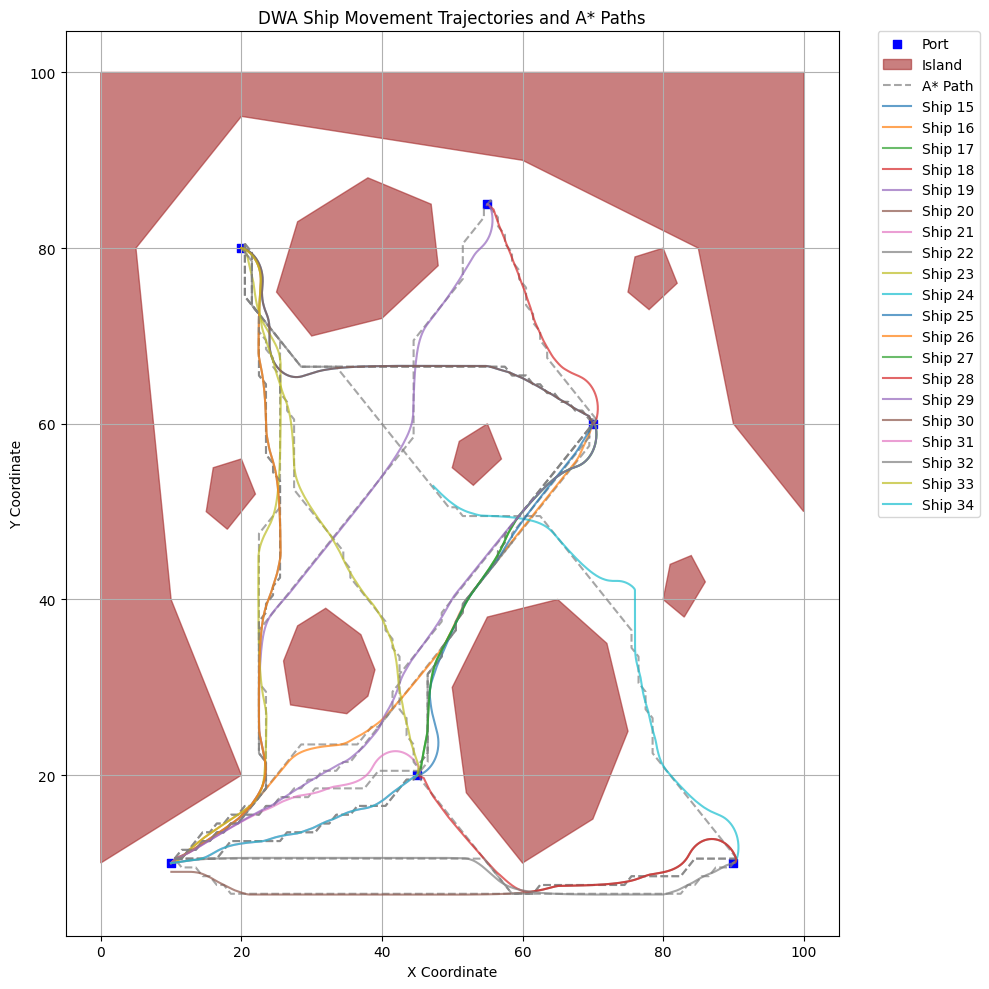

In [34]:
from visualization import plot_simulation

# Run visualization
plot_simulation(df, config)

In [35]:
import movingpandas as mpd

start_datetime = datetime.now()
df["t"] = df["Step"].apply(lambda step: start_datetime + timedelta(seconds=step))
tc = mpd.TrajectoryCollection(df, traj_id_col='AgentID', t='t', x='x', y='y', crs=31287)

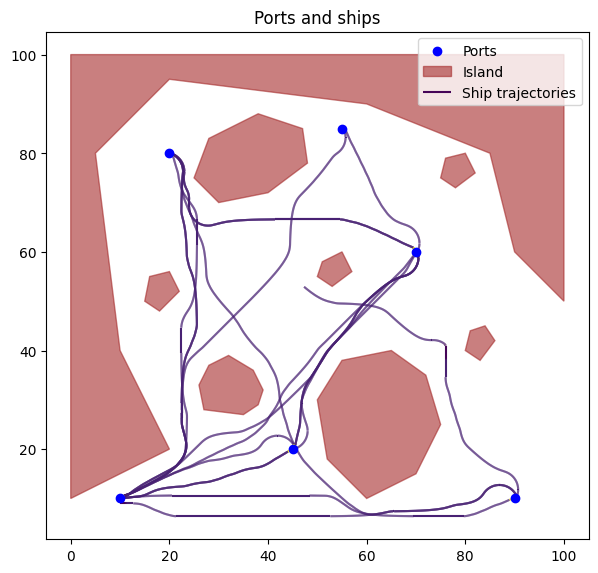

In [36]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

fig, ax = plt.subplots(figsize=(7,7))

x_coords, y_coords = zip(*config["ports"])
ax.scatter(x_coords, y_coords, color='blue', label='Ports', zorder=5)

for island in config["obstacles"]:
    island_shape = Polygon(island)
    x, y = island_shape.exterior.xy
    ax.fill(x, y, color="brown", alpha=0.6, label="Island" if 'Island' not in plt.gca().get_legend_handles_labels()[1] else "")

tc.plot(ax=ax, label='Ship trajectories', column='speed')

# Labels and legend
ax.legend()
ax.set_title("Ports and ships")

plt.show()

In [46]:
tc.trajectories[9].hvplot()

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (triangle_angle)

In [48]:
tc.add_speed(overwrite=True)
tc.trajectories[9].df#.hvplot(c='speed')

,Step,AgentID,AStarPath,geometry,speed
t,,,,,
2025-03-18 12:52:55.449768,0,24,"[(90.5, 10.5), (89.5, 11.5), (88.5, 12.5), (87...",POINT (90 10),0.005
2025-03-18 12:52:56.449768,1,24,"[(90.5, 10.5), (89.5, 11.5), (88.5, 12.5), (87...",POINT (90.005 10),0.005
2025-03-18 12:52:57.449768,2,24,"[(90.5, 10.5), (89.5, 11.5), (88.5, 12.5), (87...",POINT (90.015 10),0.010
2025-03-18 12:52:58.449768,3,24,"[(90.5, 10.5), (89.5, 11.5), (88.5, 12.5), (87...",POINT (90.025 10.001),0.010
2025-03-18 12:52:59.449768,4,24,"[(90.5, 10.5), (89.5, 11.5), (88.5, 12.5), (87...",POINT (90.035 10.002),0.010
...,...,...,...,...,...
2025-03-18 13:09:31.449768,996,24,"[(90.5, 10.5), (89.5, 11.5), (88.5, 12.5), (87...",POINT (47.619 52.658),0.100
2025-03-18 13:09:32.449768,997,24,"[(90.5, 10.5), (89.5, 11.5), (88.5, 12.5), (87...",POINT (47.542 52.722),0.100
2025-03-18 13:09:33.449768,998,24,"[(90.5, 10.5), (89.5, 11.5), (88.5, 12.5), (87...",POINT (47.466 52.787),0.100


In [49]:
sim_result = tc.to_point_gdf()
sim_result['x'] = sim_result.geometry.x
sim_result['y'] = sim_result.geometry.y
sim_result = sim_result.drop('AStarPath', axis=1)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
sim_out_file_name = f'sim_{timestamp}.csv'
sim_result.to_csv(sim_out_file_name)
print(f'Saved simulation results to {sim_out_file_name}')

Saved simulation results to sim_20250318_125558.csv


### Anomaly Simulation

In [50]:
import numpy as np
import pandas as pd
import movingpandas as mpd
from datetime import datetime, timedelta

In [51]:
sim_out_file_name = 'sim_20250318_125558.csv'

In [52]:
sims = pd.read_csv(sim_out_file_name)
sims['is_anomaly'] = False
sims['anomaly_type'] = 'n/a'
tc = mpd.TrajectoryCollection(sims, t='t', traj_id_col='AgentID', x='x', y='y', crs=31287)
tc

TrajectoryCollection with 20 trajectories

In [53]:
# Remove stopped segments (with speed < 0.01)
tc = mpd.SpeedSplitter(tc).split(speed=0.01, duration=timedelta(seconds=5))

### Speed

* Change the timestamps to make a subsection of the trajectory faster

In [54]:
def inject_speed_anomaly(traj, duration_pct=(0.1,0.2), speedup_pct=(1.5,2.5)):
    df = traj.df.copy()
    df.reset_index(inplace=True)
    df["t_diff"] = df['t'].diff()
    # Choose within middle range
    total_steps = len(df)
    anomaly_start_idx = np.random.randint(0.1 * total_steps, 0.8 * total_steps)  
    duration_pct = duration_pct[0] + (np.random.random() * (duration_pct[1]-duration_pct[0]))
    anomaly_duration = int(duration_pct * total_steps)  
    # Insert new values
    speedup_pct = speedup_pct[0] + (np.random.random() * (speedup_pct[1]-speedup_pct[0]))
    new_vals = df.iloc[anomaly_start_idx : anomaly_start_idx + anomaly_duration].t_diff / speedup_pct
    df.loc[anomaly_start_idx : anomaly_start_idx + anomaly_duration -1, "t_diff"] = new_vals
    # Flag anomalies
    df.loc[anomaly_start_idx : anomaly_start_idx + anomaly_duration -1, "is_anomaly"] = True
    df.loc[anomaly_start_idx : anomaly_start_idx + anomaly_duration -1, "anomaly_type"] = 'speed'

    # Correct the timestamp update logic
    df["t"] = df["t"].iloc[0] + df["t_diff"].fillna(pd.Timedelta(seconds=0)).cumsum()
    return mpd.Trajectory(df,t='t',traj_id=traj.id)

<Axes: >

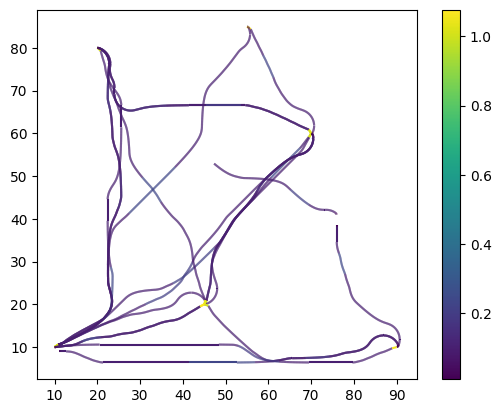

In [55]:
for i, traj in enumerate(tc.trajectories):
    traj = inject_speed_anomaly(traj)
    tc.trajectories[i] = traj
    
tc.add_speed(overwrite=True)
tc.plot(column='speed', legend=True)

### Location

Select all trajectories that go through a certain area and mark them anomalous

<Axes: >

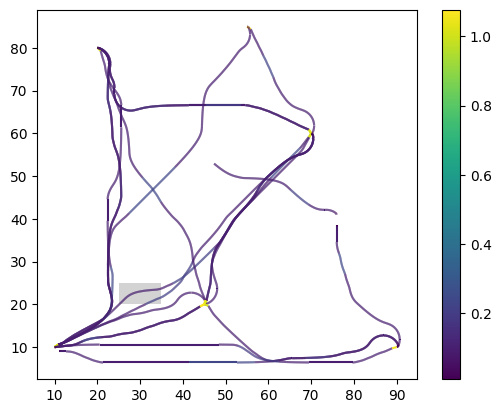

In [58]:
from shapely.geometry import Polygon
from geopandas import GeoSeries
xmin, xmax, ymin, ymax = 25, 35, 20, 25
polygon = Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin), (xmin, ymin)])

ax= tc.plot(column='speed', legend=True)
GeoSeries(polygon).plot(ax=ax, color="lightgray")

### Direction

* Pick an OD combination that will be marked as anomalous in one direction

In [59]:
tc.to_point_gdf()

,Step,AgentID,geometry,speed,is_anomaly,anomaly_type,t_diff,traj_id
t,,,,,,,,
2025-03-18 12:52:55.449768000,0,15_0,POINT (20 80),0.010000,False,n/a,NaT,15_0
2025-03-18 12:52:56.449768000,1,15_0,POINT (20.01 80),0.010000,False,n/a,0 days 00:00:01,15_0
2025-03-18 12:52:57.449768000,2,15_0,POINT (20.025 80),0.015000,False,n/a,0 days 00:00:01,15_0
2025-03-18 12:52:58.449768000,3,15_0,POINT (20.045 79.999),0.020000,False,n/a,0 days 00:00:01,15_0
2025-03-18 12:52:59.449768000,4,15_0,POINT (20.07 79.997),0.025000,False,n/a,0 days 00:00:01,15_0
...,...,...,...,...,...,...,...,...
2025-03-18 12:58:38.385317324,363,34_0,POINT (43.789 19.36),0.100000,False,n/a,0 days 00:00:01,34_0
2025-03-18 12:58:39.385317324,364,34_0,POINT (43.874 19.412),0.100000,False,n/a,0 days 00:00:01,34_0
2025-03-18 12:58:40.385317324,365,34_0,POINT (43.96 19.464),0.100000,False,n/a,0 days 00:00:01,34_0
